# Measurement of alpha rhythm change between control and experimental condition

In [3]:
import numpy as np
import scipy.signal as sg
import pylab as plt
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
path_nfb = r'/Users/timofej/nfb-master'
sys.path.insert(0, path_nfb)
from utils.load_results import load_data

### To quickly check the conditions of the experiment:
- Take records of two different conditions;
- Select one spatial channel;
- Separate the time interval that we are interested in;
- Estimate signal spectral density using Welch's method for both records;
- Visualize both distributions


In [4]:
data = r'/Users/belinskaia/Desktop/CBI/Tum_Data/A05_alpha_train/video_fb_subj_A05_1_01-27_17-26-28/experiment_data.h5'
df, fs, channels, p_names = load_data(data)
fs = int(fs)

In [5]:
data_mock = r'/Users/belinskaia/Desktop/CBI/Tum_Data/Tum_mock/CO3/video_fb_subj_C03_1_01-20_17-29-27/experiment_data.h5'
df_mock, fs, channels_mock, p_names_mock = load_data(data_mock)
fs = int(fs)

In [6]:
df.head(3)

FP1           FP2            F7            F3            FZ        F4  \
0 -0.000001 -3.806206e-07 -3.667863e-07  1.774275e-07 -3.717009e-07  0.000002   
1 -0.000002  1.333124e-06 -1.645002e-06 -8.469502e-07  6.256323e-07  0.000004   
2 -0.000006 -9.133375e-07 -5.581103e-06 -4.815390e-06 -1.889212e-06  0.000002   

         F8       FT9       FC5           FC1  ...        P4        P8  \
0  0.000002 -0.000002 -0.000003  8.767321e-07  ...  0.000007  0.000008   
1  0.000005 -0.000005 -0.000003  2.423172e-06  ...  0.000008  0.000011   
2  0.000004 -0.000010 -0.000006 -5.975798e-09  ...  0.000006  0.000010   

         O1        OZ        O2     VIDEO  signal_Alpha0  events  block_name  \
0 -0.000019 -0.000019 -0.000013 -0.149021       0.000014     0.0       Close   
1 -0.000012 -0.000015 -0.000008 -0.149147       0.000014     0.0       Close   
2 -0.000006 -0.000011 -0.000004 -0.149172       0.000014     0.0       Close   

   block_number  
0             1  
1             1  
2             1  

[3 rows x 37 columns]

(0.0, 45.0)

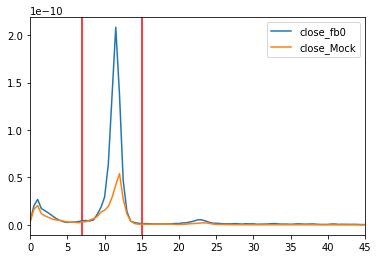

In [9]:
baseline4 = df.loc[df.block_number==1,'P4'].values
f_b4, pxx_b4 = (sg.welch(baseline4, fs=fs, nperseg=1000))

baseline6 = df_mock.loc[df_mock.block_number==1,'P4'].values
f_b6, pxx_b6 = (sg.welch(baseline6, fs=fs, nperseg=1000))


baseline4_open = df.loc[df.block_number==6,'P4'].values
f_b4_open , pxx_b4_open  = (sg.welch(baseline4, fs=fs, nperseg=1000))

baseline6_open  = df_mock.loc[df_mock.block_number==6,'P4'].values
f_b6_open , pxx_b6_open  = (sg.welch(baseline6, fs=fs, nperseg=1000))

band = (7,15)
plt.axvline(band[0], color = 'r')
plt.axvline(band[1], color = 'r')
plt.plot(f_b4, pxx_b4, label='close_fb0')
plt.plot(f_b6, pxx_b6, label='close_Mock')


plt.legend(loc=1)

plt.xlim(0, 45)